In [1]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from scipy.spatial.distance import pdist, squareform, cdist
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = 12, 8


# Define some functions

def distance_to_c1(point):
    return math.sqrt((point.x - centroids.loc['c1'].x)**2 + (point.y - centroids.loc['c1'].y)**2)

def distance_to_c2(point):
    return math.sqrt((point.x - centroids.loc['c2'].x)**2 + (point.y - centroids.loc['c2'].y)**2)

def calculate_distances_to_centroids():
    data['c1_dist'] = data.apply(distance_to_c1, axis=1)
    data['c2_dist'] = data.apply(distance_to_c2, axis=1)
    
def get_closest_centroid(point):
    if point['c1_dist'] > point['c2_dist']:
        return 'c2'
    else:
        return 'c1'
    
def centroid_assignment():
    data['centroid'] = data.apply(get_closest_centroid, axis=1)
    
def recalculate_cluster_centers():
    c1_points = data[data['centroid'] == 'c1']
    c2_points = data[data['centroid'] == 'c2']
    centroids['x'] = [c1_points['x'].mean(), c2_points['x'].mean()]
    centroids['y'] = [c1_points['y'].mean(), c2_points['y'].mean()]
    
def compute_sse():
    c1 = data[data['centroid'] == 'c1']['c1_dist'].apply(np.square).sum()
    c2 = data[data['centroid'] == 'c2']['c2_dist'].apply(np.square).sum()
    return c1 + c2
    
def plot_kmeans():
    sns.scatterplot('x', 'y', data=data, hue='centroid', s=100)
    #sns.scatterplot('x', 'y', data=centroids, , c=['red'])
    plt.scatter(centroids.x, centroids.y, s=4000, marker='x', c=['orange', 'navy'])

# K-Means

Steps:
- Initialize centroids
- Calculate distance of each point to the centroids
- Assign points to its nearest centroid
- Recalculate centroid positions
- Repeat 2 to 4 till cluster assignments do not change

,x,y
p1,1.0,1.0
p2,2.0,2.0
p3,3.0,1.0
p4,3.0,2.5
p5,2.0,8.0
p6,2.0,6.0
p7,2.5,7.0
p8,4.0,7.0
p9,6.0,2.0
p10,7.0,3.0


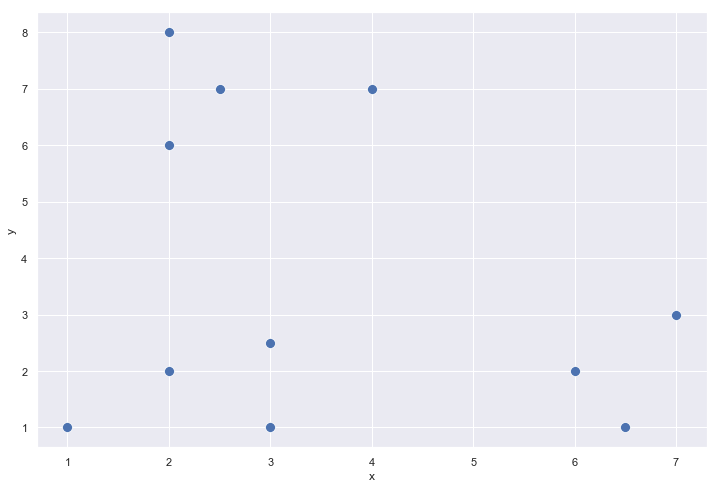

In [3]:
x = [1, 2, 3, 3,   2, 2, 2.5, 4, 6, 7, 6.5]
y = [1, 2, 1, 2.5, 8, 6, 7,   7, 2, 3, 1]
index = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10','p11']
data = pd.DataFrame({'x': x, 'y': y}, index=index)
display(data)
sns.scatterplot('x', 'y', data=data, s=100, legend=None)

### Step 1) Initialize centroids

In [4]:
centroids = pd.DataFrame([data.loc['p10'][['x', 'y']], data.loc['p11'][['x', 'y']]], index=['c1', 'c2'])
centroids

,x,y
c1,7.0,3.0
c2,6.5,1.0


In the table above are the coordinates of points p10 and p11, which will be used as the initial centroids

# ITERATION 1
### Step 2) Calculate distance of each point to the centroids

In [5]:
calculate_distances_to_centroids()
data

,x,y,c1_dist,c2_dist
p1,1.0,1.0,6.324555,5.500000
p2,2.0,2.0,5.099020,4.609772
p3,3.0,1.0,4.472136,3.500000
p4,3.0,2.5,4.031129,3.807887
p5,2.0,8.0,7.071068,8.321658
p6,2.0,6.0,5.830952,6.726812
p7,2.5,7.0,6.020797,7.211103
p8,4.0,7.0,5.000000,6.500000
p9,6.0,2.0,1.414214,1.118034
p10,7.0,3.0,0.000000,2.061553


### Step 3) Assign each point to its closest centroid.

,x,y,c1_dist,c2_dist,centroid
p1,1.0,1.0,6.324555,5.500000,c2
p2,2.0,2.0,5.099020,4.609772,c2
p3,3.0,1.0,4.472136,3.500000,c2
p4,3.0,2.5,4.031129,3.807887,c2
p5,2.0,8.0,7.071068,8.321658,c1
p6,2.0,6.0,5.830952,6.726812,c1
p7,2.5,7.0,6.020797,7.211103,c1
p8,4.0,7.0,5.000000,6.500000,c1
p9,6.0,2.0,1.414214,1.118034,c2
p10,7.0,3.0,0.000000,2.061553,c1


,x,y
c1,7.0,3.0
c2,6.5,1.0


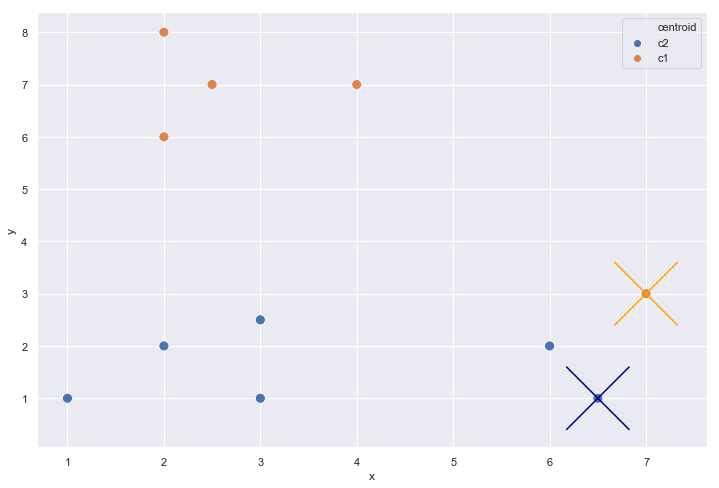

In [6]:
centroid_assignment()
display(data)
display(centroids)
plot_kmeans()

In [7]:
print('SSE at Iteration 1: {}'.format(str(compute_sse())))

SSE at Iteration 1: 224.75


### The SSE at Iteration 1 is 224.75

### Step 4) Recalculate cluster centroids

,x,y
c1,3.500000,6.200000
c2,3.583333,1.583333


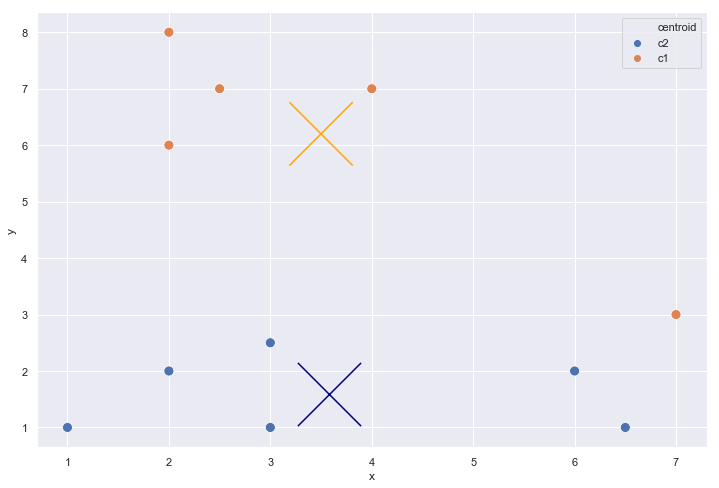

In [8]:
recalculate_cluster_centers()
display(centroids)
plot_kmeans()

### Step 5) Repeat steps 2 to 4 till the cluster assignments do not change

# ITERATION 2

#### Calculate distance of each point to the centroids (step 2).
#### Assign each point to its nearest centroid (step 3).

,x,y,c1_dist,c2_dist,centroid
p1,1.0,1.0,5.769749,2.648375,c2
p2,2.0,2.0,4.459821,1.637240,c2
p3,3.0,1.0,5.223983,0.824958,c2
p4,3.0,2.5,3.733631,1.086534,c2
p5,2.0,8.0,2.343075,6.609127,c1
p6,2.0,6.0,1.513275,4.691896,c1
p7,2.5,7.0,1.280625,5.523938,c1
p8,4.0,7.0,0.943398,5.432669,c1
p9,6.0,2.0,4.887740,2.452323,c2
p10,7.0,3.0,4.742362,3.698724,c2


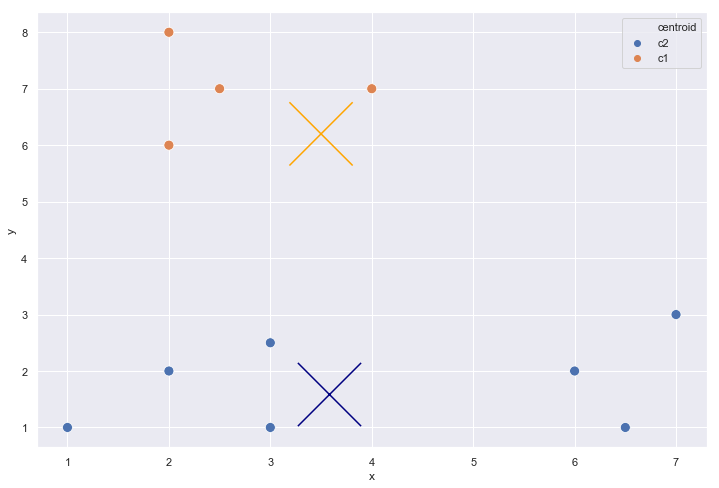

In [9]:
calculate_distances_to_centroids()
centroid_assignment()
display(data)
plot_kmeans()

In [10]:
print('SSE at Iteration 2: {}'.format(str(compute_sse())))

SSE at Iteration 2: 50.40722222222222


### The SSE at Iteration 2 is 50.407

#### Recalculate centroids (step 4).

,x,y
c1,2.625000,7.000000
c2,4.071429,1.785714


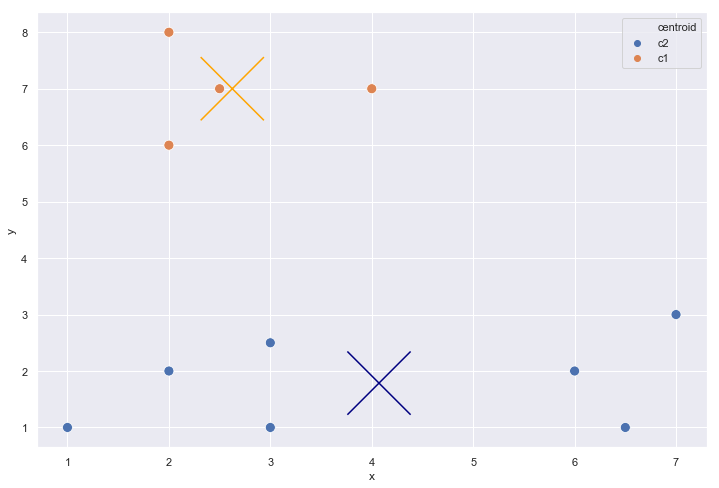

In [11]:
recalculate_cluster_centers()
display(centroids)
plot_kmeans()

### Repeat steps 2-4 again.

# ITERATION 3

,x,y,c1_dist,c2_dist,centroid
p1,1.0,1.0,6.216158,3.170334,c2
p2,2.0,2.0,5.038911,2.082483,c2
p3,3.0,1.0,6.011707,1.328648,c2
p4,3.0,2.5,4.515598,1.287697,c2
p5,2.0,8.0,1.179248,6.550432,c1
p6,2.0,6.0,1.179248,4.695851,c1
p7,2.5,7.0,0.125000,5.445931,c1
p8,4.0,7.0,1.375000,5.214775,c1
p9,6.0,2.0,6.032464,1.940440,c2
p10,7.0,3.0,5.927953,3.170334,c2


,x,y
c1,2.625000,7.000000
c2,4.071429,1.785714


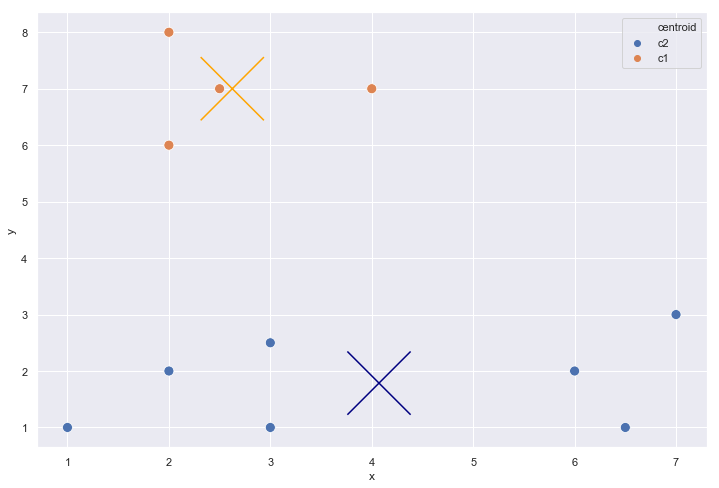

In [12]:
calculate_distances_to_centroids()
centroid_assignment()
display(data)
display(centroids)
plot_kmeans()

In [13]:
print('SSE at Iteration 2: {}'.format(str(compute_sse())))

SSE at Iteration 2: 42.830357142857146


### The SSE at Iteration 3 is 42.83

,x,y
c1,2.625000,7.000000
c2,4.071429,1.785714


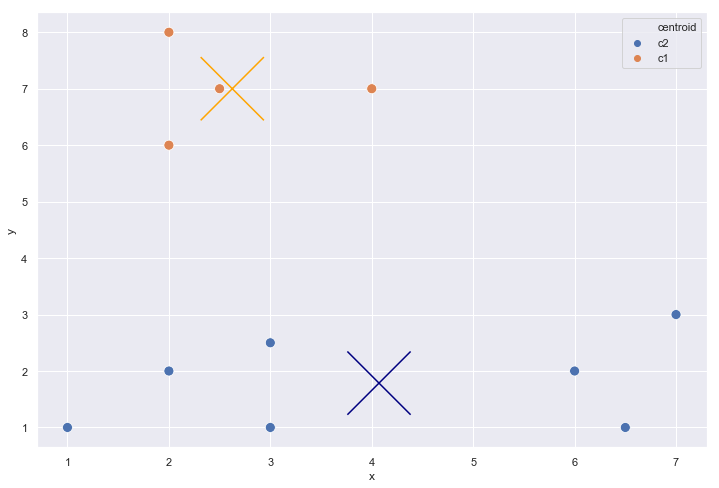

In [14]:
recalculate_cluster_centers()
display(centroids)
plot_kmeans()

# Since the cluster assignments in iteration 3 did not change from iteration 2, K-means has converged, and the algorithm can be stopped. The output is the original points partitioned into two groups.

## Example of bad initialization 
![title](img/kmeans_problem1.png)

## Example of bad clustering due to clusters of different sizes
![title](img/kmeans_problem2.png)

## Example of bad clustering due to outliers
![title](img/kmeans_problem3.png)

In [18]:
data

,x,y,c1_dist,c2_dist,centroid
p1,1.0,1.0,6.216158,3.170334,c2
p2,2.0,2.0,5.038911,2.082483,c2
p3,3.0,1.0,6.011707,1.328648,c2
p4,3.0,2.5,4.515598,1.287697,c2
p9,6.0,2.0,6.032464,1.940440,c2
p10,7.0,3.0,5.927953,3.170334,c2
p11,6.5,1.0,7.142522,2.552510,c2


In [21]:
centroids = pd.DataFrame([data.loc['p10'][['x', 'y']], data.loc['p11'][['x', 'y']]], index=['c1', 'c2'])
centroids

,x,y
c1,7.0,3.0
c2,6.5,1.0


In [22]:
calculate_distances_to_centroids()
data

C:\Users\Tirtha\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Tirtha\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,x,y,c1_dist,c2_dist,centroid
p1,1.0,1.0,6.324555,5.500000,c2
p2,2.0,2.0,5.099020,4.609772,c2
p3,3.0,1.0,4.472136,3.500000,c2
p4,3.0,2.5,4.031129,3.807887,c2
p9,6.0,2.0,1.414214,1.118034,c2
p10,7.0,3.0,0.000000,2.061553,c2
p11,6.5,1.0,2.061553,0.000000,c2


C:\Users\Tirtha\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,x,y,c1_dist,c2_dist,centroid
p1,1.0,1.0,6.324555,5.500000,c2
p2,2.0,2.0,5.099020,4.609772,c2
p3,3.0,1.0,4.472136,3.500000,c2
p4,3.0,2.5,4.031129,3.807887,c2
p9,6.0,2.0,1.414214,1.118034,c2
p10,7.0,3.0,0.000000,2.061553,c1
p11,6.5,1.0,2.061553,0.000000,c2


,x,y
c1,7.0,3.0
c2,6.5,1.0


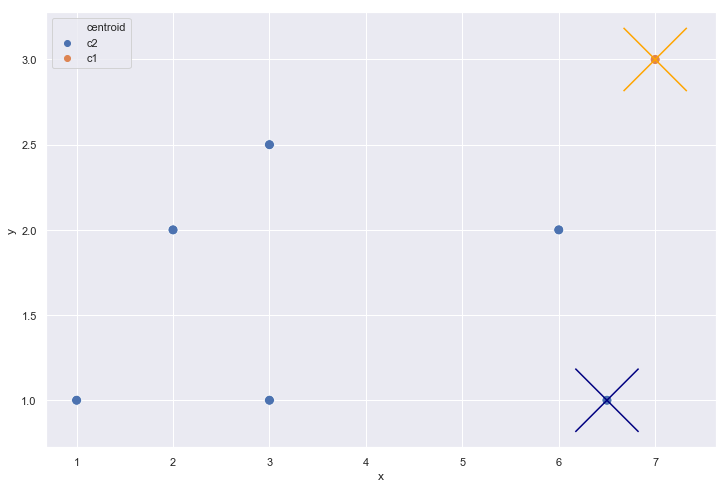

In [23]:
centroid_assignment()
display(data)
display(centroids)
plot_kmeans()

,x,y
c1,7.000000,3.000000
c2,3.583333,1.583333


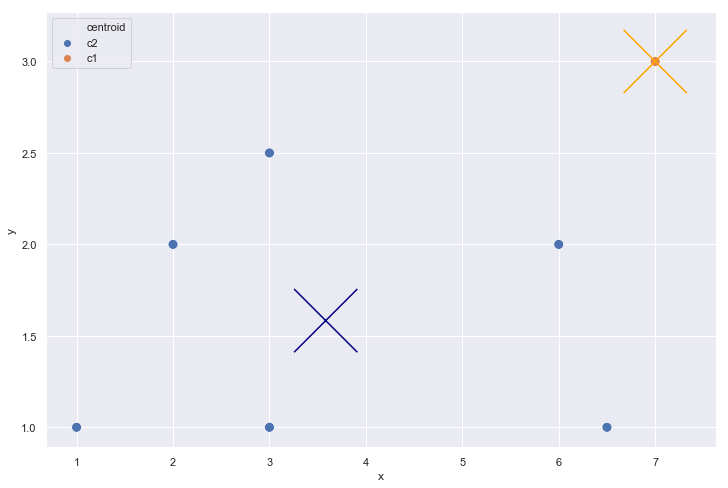

In [26]:
recalculate_cluster_centers()
display(centroids)
plot_kmeans()

C:\Users\Tirtha\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,x,y,c1_dist,c2_dist,centroid
p1,1.0,1.0,6.324555,5.500000,c2
p2,2.0,2.0,5.099020,4.609772,c2
p3,3.0,1.0,4.472136,3.500000,c2
p4,3.0,2.5,4.031129,3.807887,c2
p9,6.0,2.0,1.414214,1.118034,c2
p10,7.0,3.0,0.000000,2.061553,c1
p11,6.5,1.0,2.061553,0.000000,c2


,x,y
c1,7.000000,3.000000
c2,3.583333,1.583333


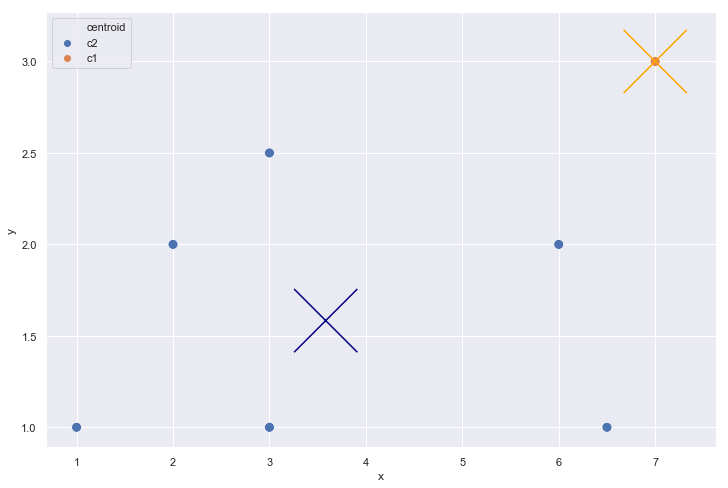

In [27]:
centroid_assignment()
display(data)
display(centroids)
plot_kmeans()